In [1]:
import os

import numpy as np
import pandas as pd

import hrv_features
import hrv

from scipy.signal import welch

In [8]:
seizure_features = pd.read_parquet('data\\features_p413_seizure.parquet')
baseline_features = pd.read_parquet('data\\features_p413_baseline.parquet')
seizures = pd.read_csv('data\\seizure_label_p413')
seizure_dates = pd.to_datetime(seizures['Date'], dayfirst=True)
print(seizures)

   Unnamed: 0  Type                  Date  \
0           0     1  22-09-2020\n21:05:54   
1           1     2  24-09-2020\n01:31:33   
2           2     3  24-09-2020\n03:34:11   
3           3     4  24-09-2020\n05:31:12   
4           4     5  24-09-2020\n06:35:29   
5           5     6  24-09-2020\n07:37:54   
6           6     7  25-09-2020\n05:02:36   

                                               Class State ILAE  
0  Crise focal automotora sem alteração do estado...     V  FAS  
1     Crise focal automotora consciência não testada    N3  FAS  
2     Crise focal automotora consciência não testada    N1  FAS  
3     Crise focal automotora consciência não testada     V  FAS  
4      Crise focal automotora consiencia não testada     V  FAS  
5      Crise focal automotora consiencia não testada     V  FAS  
6      Crise focal automotora consiencia não testada     V  FAS  


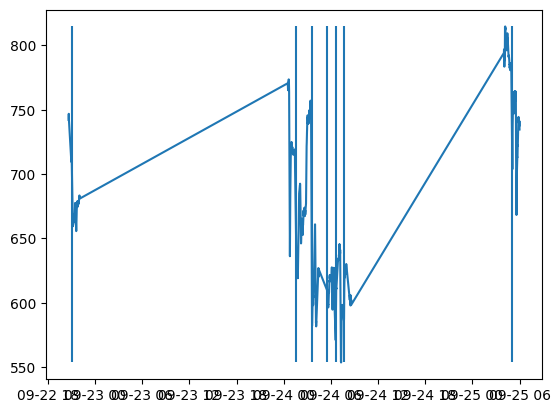

In [3]:
import matplotlib.pyplot as plt
plt.plot(seizure_features['t0'], seizure_features['meanrr'])
plt.vlines(seizure_dates, seizure_features['meanrr'].min(), seizure_features['meanrr'].max())

In [21]:
seizure_dates

0   2020-09-22 21:05:54
1   2020-09-24 01:31:33
2   2020-09-24 03:34:11
3   2020-09-24 05:31:12
4   2020-09-24 06:35:29
5   2020-09-24 07:37:54
6   2020-09-25 05:02:36
Name: Date, dtype: datetime64[ns]

seizure1.0 1


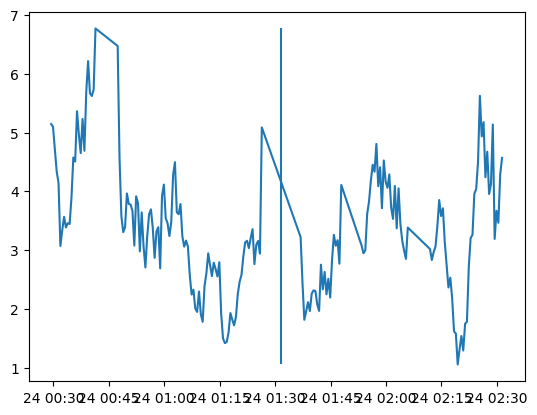

seizure5.0 5


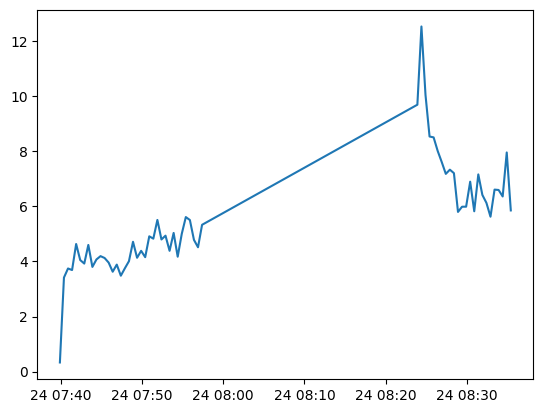

seizure2.0 2


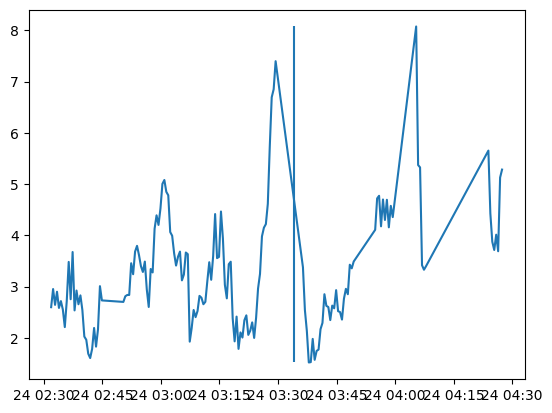

seizure6.0 6


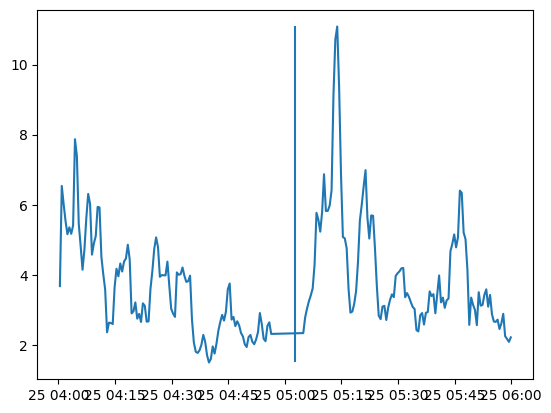

seizure0.0 0


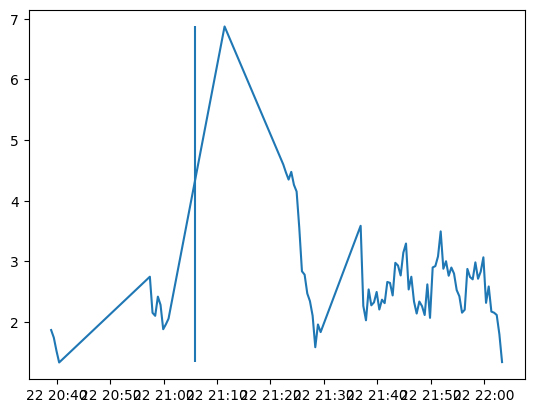

seizure3.0 3


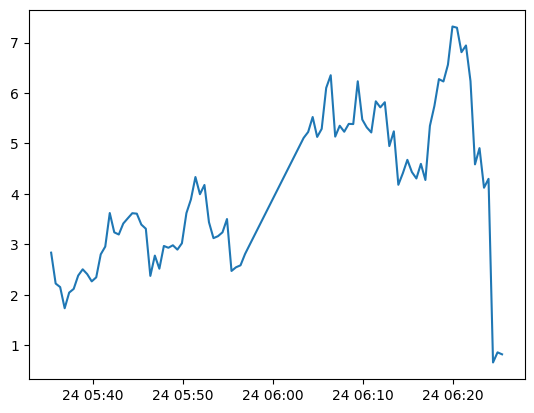

seizure4.0 4


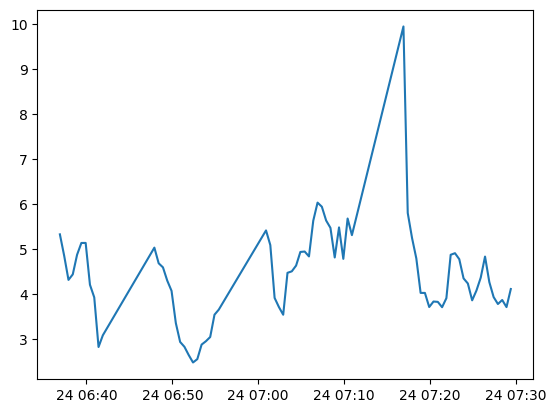

In [26]:
i = 0
for seiz in set(seizure_features['label']):

    it = int(float(seiz.split('seizure')[-1]))
    print(seiz, it)
    seiz_table = seizure_features.loc[seizure_features['label']==seiz]
    seiz_dates = [sd for sd in seizure_dates if (sd < seiz_table['t0'].iloc[-1]) & (sd > seiz_table['t0'].iloc[0])]
    plt.plot(seiz_table['t0'], seiz_table['lf_hf'])
    plt.vlines(seiz_dates, seiz_table['lf_hf'].min(), seiz_table['lf_hf'].max())
    plt.show()


In [14]:
seizure_dates

0   2020-09-22 21:05:54
1   2020-09-24 01:31:33
2   2020-09-24 03:34:11
3   2020-09-24 05:31:12
4   2020-09-24 06:35:29
5   2020-09-24 07:37:54
6   2020-09-25 05:02:36
Name: Date, dtype: datetime64[ns]